In [ ]:
# yolov3.weights 파일 다운로드 

from urllib.request import urlretrieve
urlretrieve("https://pjreddie.com/media/files/yolov3.weights", 'yolov3.weights')

('yolov3.weights', <http.client.HTTPMessage at 0x7f3046a25b20>)

In [ ]:
# yolov3-tiny.weights 파일 다운로드 
from urllib.request import urlretrieve
urlretrieve("https://pjreddie.com/media/files/yolov3.weights", 'yolov3-tiny.weights')

('yolov3-tiny.weights', <http.client.HTTPMessage at 0x7f3046a25580>)

In [ ]:
# yolov3.weights 파일 이동 mv (move)

!mv yolov3.weights drive/MyDrive/CV
print('yolov3.weights mvoe completed.')

yolov3.weights mvoe completed.


In [ ]:
!mv yolov3-tiny.weights drive/MyDrive/CV
print('yolov3-tiny.weights mvoe completed.')

yolov3-tiny.weights mvoe completed.


In [ ]:
!git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955
Receiving objects: 100% (5955/5955), 6.37 MiB | 22.74 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.


In [ ]:
# 필요한 파일만 복사 (cp: copy)

!cp darknet/cfg/yolov3.cfg drive/MyDrive/CV
!cp darknet/cfg/yolov3-tiny.cfg drive/MyDrive/CV
!cp darknet/data/coco.names drive/MyDrive/CV

In [ ]:
# 다운로드 받았던 파일 제거(선택사항)
# rm : remove 

!rm -r darknet 

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np 

In [ ]:
# OpenCV 버전 확인 
print("opencv version: ")
print(cv2.__version__)

opencv version: 
4.7.0


In [ ]:
# detection 인정할 최소 확률(신뢰도 confidence score) 지정 
min_confidence = 0.5

In [ ]:
# Load YOLO 

net = cv2.dnn.readNet("/content/drive/MyDrive/CV/yolov3.weights","/content/drive/MyDrive/CV/yolov3.cfg")


classes = []
with open("/content/drive/MyDrive/CV/coco.names","r") as f: 
  classes = [line.strip() for line in f.readlines()]
  # print(classes)
  # print(len(classes)) 
  # 80개의 object(class) 구분할 수 있는 object 이름을 classes 배열에 넣어줌줌

layer_names = net.getLayerNames()
# print(layer_names)

output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]
# print(output_layers)
colors = np.random.uniform(0, 255, size=(len(classes), 3))
# print(colors)
# object 마다 컬러를 하나씩 다르게 지정 

['yolo_82', 'yolo_94', 'yolo_106']


In [ ]:
classes, len(classes)

(['person',
  'bicycle',
  'car',
  'motorbike',
  'aeroplane',
  'bus',
  'train',
  'truck',
  'boat',
  'traffic light',
  'fire hydrant',
  'stop sign',
  'parking meter',
  'bench',
  'bird',
  'cat',
  'dog',
  'horse',
  'sheep',
  'cow',
  'elephant',
  'bear',
  'zebra',
  'giraffe',
  'backpack',
  'umbrella',
  'handbag',
  'tie',
  'suitcase',
  'frisbee',
  'skis',
  'snowboard',
  'sports ball',
  'kite',
  'baseball bat',
  'baseball glove',
  'skateboard',
  'surfboard',
  'tennis racket',
  'bottle',
  'wine glass',
  'cup',
  'fork',
  'knife',
  'spoon',
  'bowl',
  'banana',
  'apple',
  'sandwich',
  'orange',
  'broccoli',
  'carrot',
  'hot dog',
  'pizza',
  'donut',
  'cake',
  'chair',
  'sofa',
  'pottedplant',
  'bed',
  'diningtable',
  'toilet',
  'tvmonitor',
  'laptop',
  'mouse',
  'remote',
  'keyboard',
  'cell phone',
  'microwave',
  'oven',
  'toaster',
  'sink',
  'refrigerator',
  'book',
  'clock',
  'vase',
  'scissors',
  'teddy bear',
  'hair

In [ ]:
# 원본 이미지 읽어오기 

img = cv2.imread("/content/drive/MyDrive/CV/Street.jpg")
# print(img) # 넘파이 배열로 출력 
# print(img.shape) # 700*1400 , 3 channels(r,g,b >> color)
img = cv2.resize(img, None, fx=0.7, fy=0.7)
print(img.shape) # 490 * 1008, 3 
height, width, channels = img.shape

(490, 1008, 3)


----원본 이미지-----


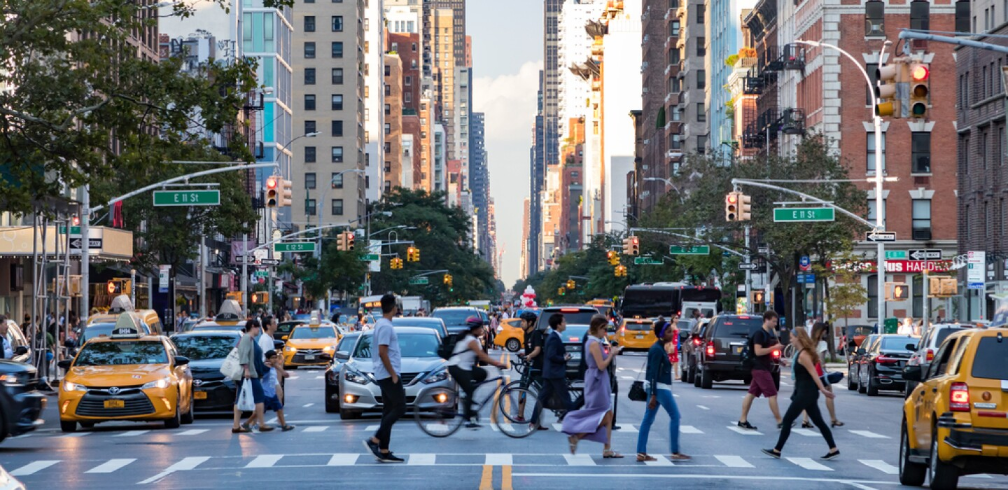

In [ ]:
# detection 전에 원본이미지를 display 

print("----원본 이미지-----")
cv2_imshow(img)

In [ ]:
# YOLO v3 detecting model 3가지 
# (320*320), (416*416), (608*608)

blob = cv2.dnn.blobFromImage(img, 0.00392, (608, 608), (0, 0, 0), True,
                             crop=False)

# 참고자료 : https://m.blog.naver.com/tommybee/222067664722

net.setInput(blob)
outs = net.forward(output_layers) 
# outs에 detected 된 object 가 들어 있음
print(outs) # 넘파이 배열로 출력 

(array([[0.02251487, 0.03293597, 0.18995512, ..., 0.        , 0.        ,
        0.        ],
       [0.03052865, 0.01960198, 0.18752818, ..., 0.        , 0.        ,
        0.        ],
       [0.03056295, 0.02440629, 0.5504994 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9712479 , 0.9646711 , 0.26331222, ..., 0.        , 0.        ,
        0.        ],
       [0.96752566, 0.97187346, 0.18333687, ..., 0.        , 0.        ,
        0.        ],
       [0.9768596 , 0.9739098 , 0.5536113 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.00977453, 0.01693882, 0.03658359, ..., 0.        , 0.        ,
        0.        ],
       [0.01060269, 0.01150108, 0.3241419 , ..., 0.        , 0.        ,
        0.        ],
       [0.01385458, 0.01001817, 0.05372478, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9803442 , 0.9824383 , 0.03671509, ..., 0.        , 0.        ,
        0.        ],
       [0.9841648 

In [ ]:
class_ids = []  #detection한 class id 저장하는 배열 
confidences = [] # dectection한 class 의 신뢰도(확률) 저장하는 배열 
boxes =[] # dectection한 bbox 정보를 저장하는 배열 

for out in outs: 
  for detection in out:
     scores = detection[5:]
     class_id = np.argmax(scores) # detection한 class id 
     confidence = scores[class_id] # detection 한 class 신뢰도(확률)
     if confidence > min_confidence: 
       # object detected
       center_x = int(detection[0] * width)
       center_y = int(detection[1] * height)
       w = int(detection[2] * width)
       h = int(detection[3] * height)

       # rectangle coordinates (직사각형 좌표)
       x = int(center_x - w / 2)
       y = int(center_y - h / 2) 

       boxes.append([x,y,w,h]) # box 정보를 boxes 배열에 저장 
       confidences.append(float(confidence)) # 신뢰도(확률)을 confidences 배열에 저장
       class_ids.append(class_id) # class_id를 class_ids 배열에 저장   

1 car
3 traffic light
4 bus
5 car
8 car
13 car
18 car
22 person
24 person
27 car
30 car
33 person
40 person
44 person
47 person
53 person
55 person
59 bicycle
62 car
66 traffic light
68 traffic light
69 traffic light
70 traffic light
71 traffic light
72 traffic light
73 traffic light
74 traffic light
75 traffic light
76 car
79 handbag


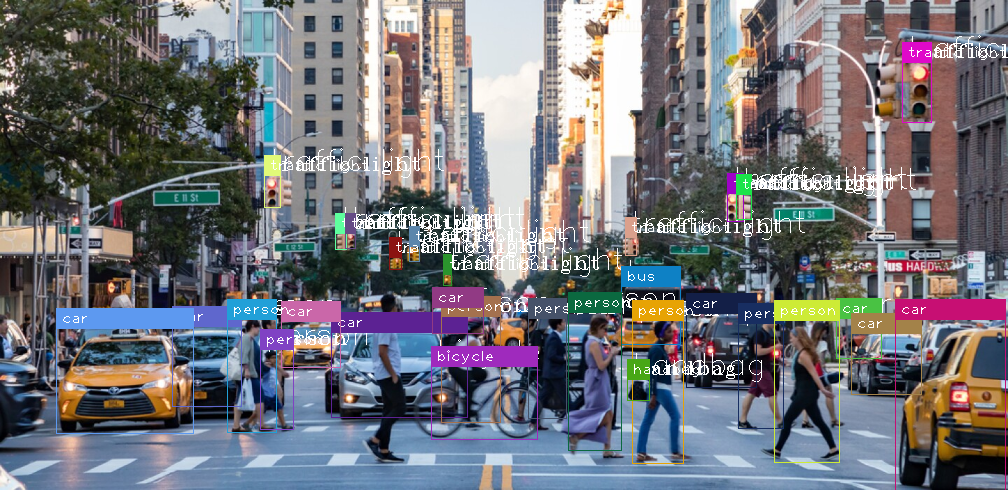

In [ ]:
# NMS (Non-max suppression) >> 중첩 제거 

indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
# 박스 안에 박스(노이즈)를 하나 만들어 줌
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)): 
  if i in indexes:  # 노이즈가 제거된 박스만 표시해 주기 위함 
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]]) # class 이름
    print(i, label)
    color = colors[i]
    cv2.rectangle(img, (x,y), (x + w, y + h), color, 1)
    cv2.rectangle(img, (x, y - 20), (x + w, y), color, -1)
    cv2.putText(img, label, (x+5, y-5), font, 1, (255,255,255), 1)

cv2_imshow(img)